Mean Squared Error: 80779.44
R² Score: 0.80


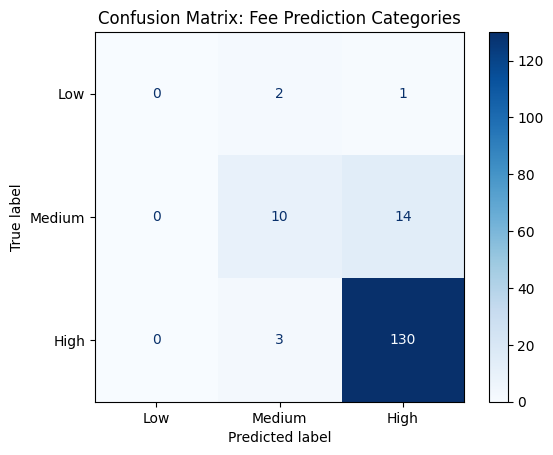

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load your dataset (replace with your actual CSV path)
df = pd.read_csv('E:/Engg Major Project/locator/Phyiotherapy/physio_fees_dataset_15cols.csv')

# Target
y = df['fee']
X = df.drop('fee', axis=1)

# Encode categorical columns
categorical_cols = ['serviceType', 'location', 'complexityLevel', 'therapistGender', 
                    'patientGender', 'timeSlot', 'insuranceCoverage', 'clinicType', 'equipmentUsed']

for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Regression metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# Create fee categories for confusion matrix
bins = [0, 500, 1000, np.inf]  # adjust thresholds based on your dataset
labels = ['Low', 'Medium', 'High']

y_test_cat = pd.cut(y_test, bins=bins, labels=labels)
y_pred_cat = pd.cut(y_pred, bins=bins, labels=labels)

# Confusion matrix
cm = confusion_matrix(y_test_cat, y_pred_cat, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix: Fee Prediction Categories")
plt.show()


,Alpha,Beta,MAE,MSE,R²
0,0.2,0.2,995.536093,1.247671e+06,-2.116564
1,0.2,0.4,683.253210,7.037417e+05,-0.757880
2,0.2,0.6,460.817917,3.735914e+05,0.066804
3,0.2,0.8,403.511676,2.572203e+05,0.357488
4,0.2,1.0,500.091823,3.546285e+05,0.114172
5,0.4,0.2,662.220220,5.853419e+05,-0.462128
6,0.4,0.4,380.210981,2.592328e+05,0.352461
7,0.4,0.6,301.996010,1.469029e+05,0.633051
8,0.4,0.8,425.651729,2.483522e+05,0.379640
9,0.4,1.0,683.244666,5.635808e+05,-0.407771


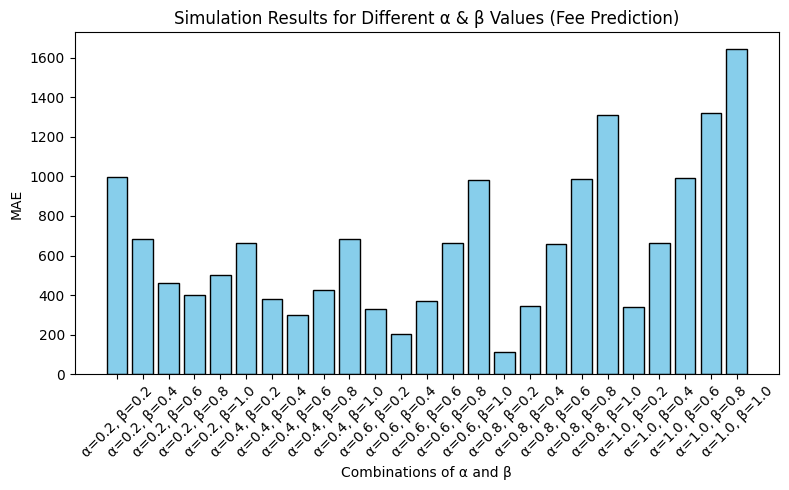


🔹 Best Combination: α=0.8, β=0.2
   MAE=112.8201, MSE=25944.2666, R²=0.9352


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Assuming your dataset is already loaded in df and has 'fee' as target
# Split dataset again to be safe
X = df.drop(columns=['fee'])
y = df['fee']

# Convert categorical columns if any
X = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Base model
base_model = LinearRegression()
base_model.fit(X_train, y_train)
y_pred_base = base_model.predict(X_test)

# Alpha-Beta simulation (like paper)
alpha_values = [0.2, 0.4, 0.6, 0.8, 1.0]
beta_values = [0.2, 0.4, 0.6, 0.8, 1.0]

results = []

for alpha in alpha_values:
    for beta in beta_values:
        # Weighted adjustment on base predictions (simulating parameter tuning)
        y_pred_adjusted = (alpha * y_pred_base) + (beta * np.mean(y_train))
        
        mae = mean_absolute_error(y_test, y_pred_adjusted)
        mse = mean_squared_error(y_test, y_pred_adjusted)
        r2 = r2_score(y_test, y_pred_adjusted)
        
        results.append((alpha, beta, mae, mse, r2))

# Store results in DataFrame
results_df = pd.DataFrame(results, columns=['Alpha', 'Beta', 'MAE', 'MSE', 'R²'])
display(results_df)

# --- Plotting MAE for visualization (like Figure 4.1) ---
plt.figure(figsize=(8,5))
plt.bar(range(len(results_df)), results_df['MAE'], color='skyblue', edgecolor='black')
plt.xticks(range(len(results_df)), [f"α={a}, β={b}" for a,b in zip(results_df['Alpha'], results_df['Beta'])], rotation=45)
plt.ylabel("MAE")
plt.xlabel("Combinations of α and β")
plt.title("Simulation Results for Different α & β Values (Fee Prediction)")
plt.tight_layout()
plt.show()

# --- Optional: Highlight best combination ---
best_combo = results_df.loc[results_df['MAE'].idxmin()]
print(f"\n🔹 Best Combination: α={best_combo.Alpha}, β={best_combo.Beta}")
print(f"   MAE={best_combo.MAE:.4f}, MSE={best_combo.MSE:.4f}, R²={best_combo['R²']:.4f}")


Statistical Analysis of Ratings and Experience:
          rating  experience
count  67.000000   67.000000
mean    4.844776   13.567164
std     0.129432    4.486424
min     4.500000    3.000000
25%     4.800000   10.500000
50%     4.900000   13.000000
75%     4.950000   16.000000
max     5.000000   25.000000


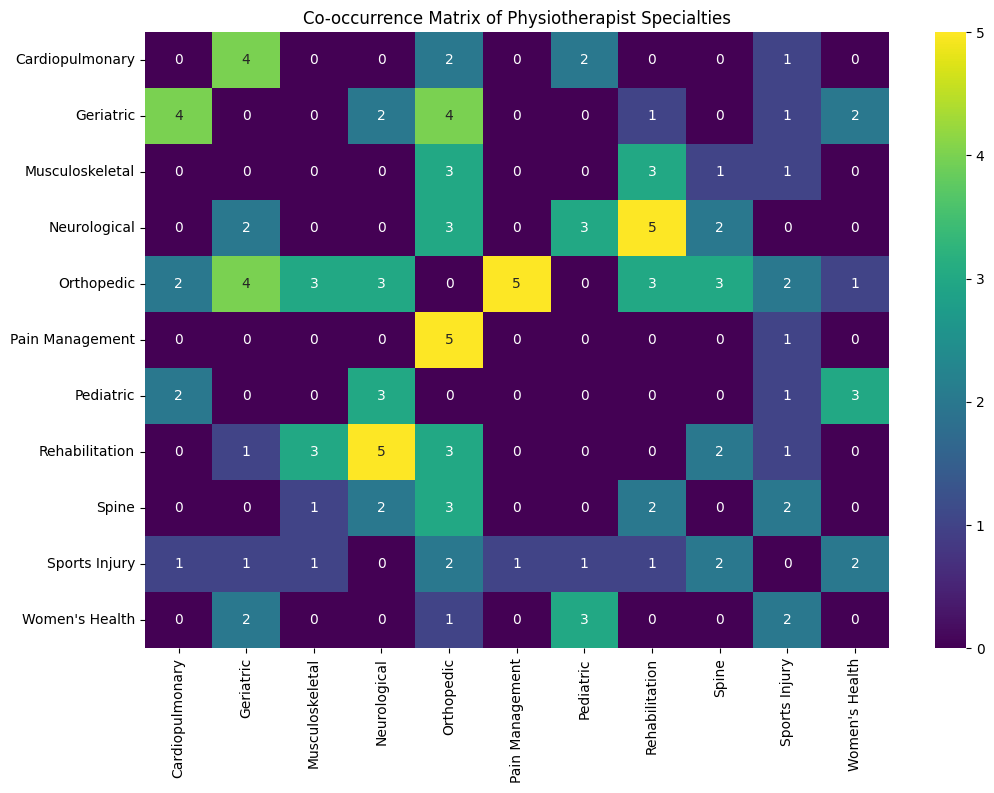

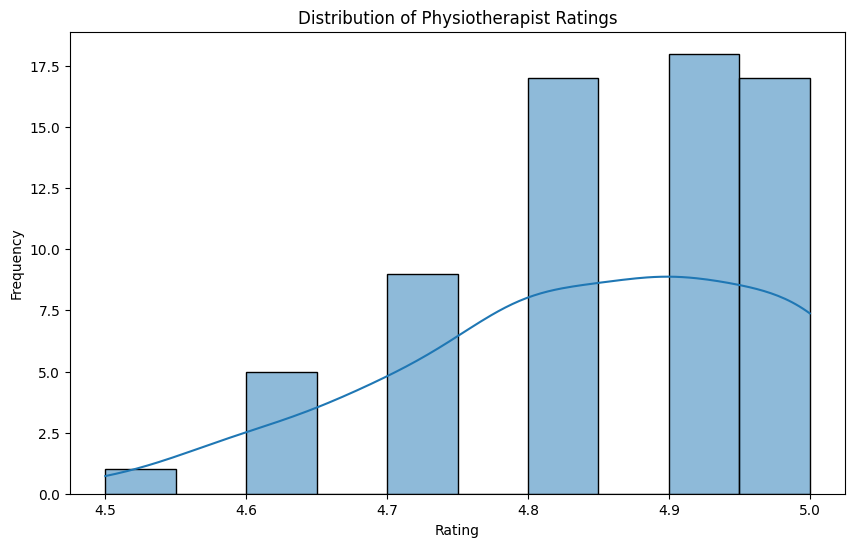

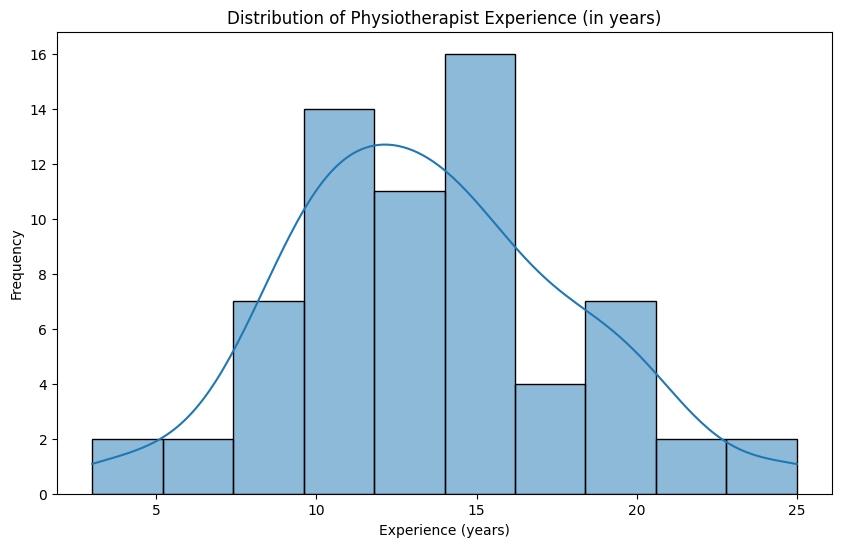

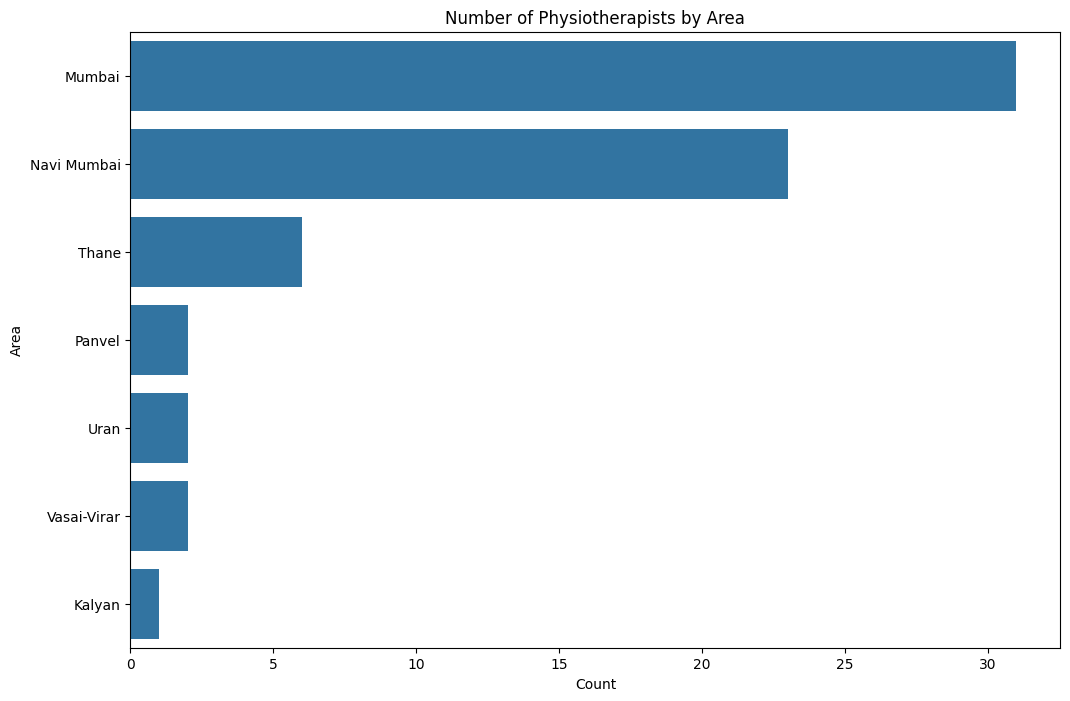

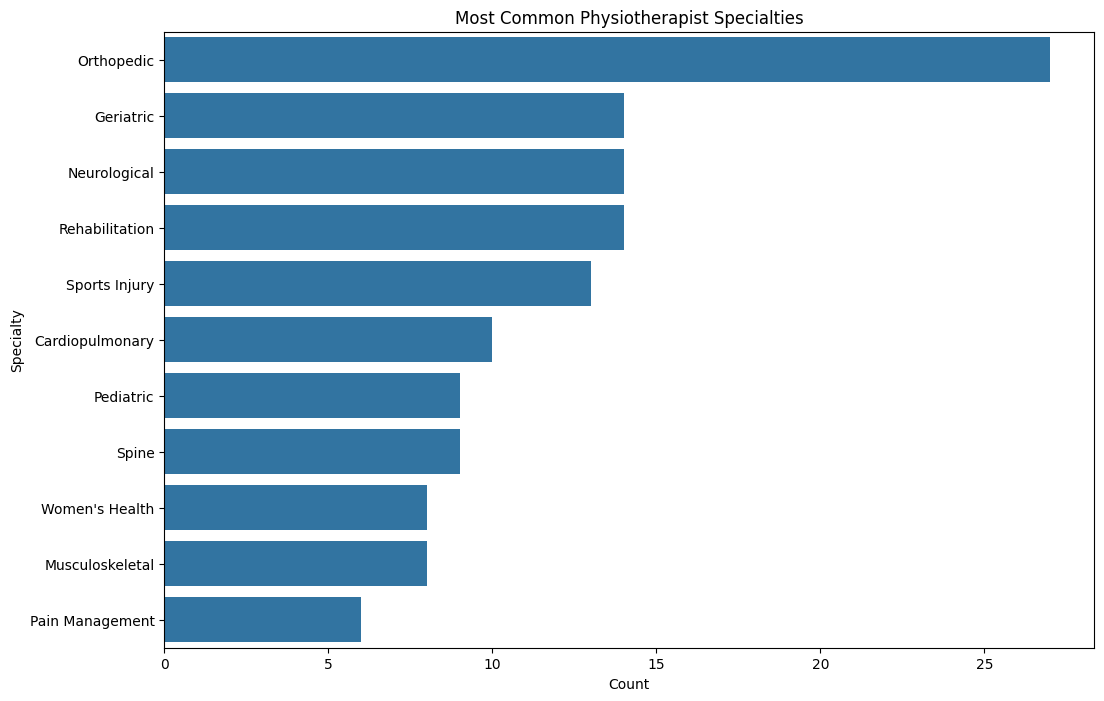

In [11]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Correctly formatted JSON data
json_data = """
[
    { "name": "Dr. Ananya Sharma", "location": { "lat": 18.9248, "lng": 72.8306 }, "address": "101, Marine Lines, Mumbai", "contact": "981-123-4567", "rating": 4.9, "specialties": ["Orthopedic", "Sports Injury"], "hospital": "Jaslok Hospital", "experience": 12 },
    { "name": "Dr. Rohan Patil", "location": { "lat": 19.0170, "lng": 72.8279 }, "address": "205, Dadar West, Mumbai", "contact": "982-234-5678", "rating": 4.8, "specialties": ["Cardiopulmonary", "Geriatric"], "hospital": null, "experience": 15 },
    { "name": "Dr. Priya Gupta", "location": { "lat": 19.0760, "lng": 72.8777 }, "address": "301, Andheri East, Mumbai", "contact": "983-345-6789", "rating": 4.7, "specialties": ["Neurological", "Pediatric"], "hospital": "Kokilaben Dhirubhai Ambani Hospital", "experience": 10 },
    { "name": "Dr. Vikram Singh", "location": { "lat": 19.0494, "lng": 72.8807 }, "address": "410, Kurla West, Mumbai", "contact": "984-456-7890", "rating": 4.6, "specialties": ["Sports Injury", "Women's Health"], "hospital": null, "experience": 8 },
    { "name": "Dr. Sanjana Kapoor", "location": { "lat": 19.1415, "lng": 72.8277 }, "address": "503, Borivali East, Mumbai", "contact": "985-567-8901", "rating": 5.0, "specialties": ["Orthopedic", "Geriatric"], "hospital": "Sanjeevani Hospital", "experience": 20 },
    { "name": "Dr. Saanvi Rao", "location": { "lat": 19.0833, "lng": 72.8433 }, "address": "45, Bandra West, Mumbai", "contact": "991-123-4567", "rating": 4.8, "specialties": ["Orthopedic", "Neurological"], "hospital": null, "experience": 14 },
    { "name": "Dr. Krish Malhotra", "location": { "lat": 19.0435, "lng": 72.9069 }, "address": "56, Chembur, Mumbai", "contact": "992-234-5678", "rating": 4.6, "specialties": ["Cardiopulmonary"], "hospital": "Zenith Hospital", "experience": 10 },
    { "name": "Dr. Zara Khan", "location": { "lat": 19.1673, "lng": 72.9515 }, "address": "78, Mulund East, Mumbai", "contact": "993-345-6789", "rating": 4.7, "specialties": ["Pediatric", "Sports Injury"], "hospital": null, "experience": 6 },
    { "name": "Dr. Alok Verma", "location": { "lat": 19.2085, "lng": 72.8735 }, "address": "90, Kandivali West, Mumbai", "contact": "994-456-7890", "rating": 4.9, "specialties": ["Neurological", "Geriatric"], "hospital": "Karuna Hospital", "experience": 16 },
    { "name": "Dr. Niraj Jha", "location": { "lat": 19.0664, "lng": 72.8943 }, "address": "706, Chembur East, Mumbai", "contact": "932-053-9142", "rating": 4.9, "specialties": ["Neurological", "Spine", "Rehabilitation"], "hospital": "Dr. Jha's Physioworld", "experience": 19 },
    { "name": "Dr. Shweta Doctor", "location": { "lat": 18.9669, "lng": 72.8197 }, "address": "Hajiali, Mumbai Central", "contact": "982-100-0100", "rating": 4.9, "specialties": ["Orthopedic", "Women's Health"], "hospital": "Enliven Therapy Centre", "experience": 25 },
    { "name": "Dr. Priyanka Sukthankar", "location": { "lat": 19.1170, "lng": 72.8490 }, "address": "45, Andheri East, Mumbai", "contact": "982-100-0200", "rating": 5.0, "specialties": ["Orthopedic", "Geriatric"], "hospital": "Physiowellness", "experience": 13 },
    { "name": "Dr. Megha Mehta", "location": { "lat": 19.1167, "lng": 72.9150 }, "address": "12, Powai, Mumbai", "contact": "982-100-0300", "rating": 5.0, "specialties": ["Sports Injury", "Musculoskeletal"], "hospital": "High Worth Physiotherapy Clinic", "experience": 13 },
    { "name": "Dr. Aditi Mehta", "location": { "lat": 19.0833, "lng": 72.9080 }, "address": "34, Ghatkopar East, Mumbai", "contact": "982-100-0400", "rating": 5.0, "specialties": ["Cardiopulmonary", "Orthopedic"], "hospital": "Physio and Beyond", "experience": 16 },
    { "name": "Dr. Ajay Kumar", "location": { "lat": 19.2550, "lng": 72.8570 }, "address": "10, Dahisar East, Mumbai", "contact": "987-654-3210", "rating": 4.9, "specialties": ["Orthopedic", "Pain Management"], "hospital": "Apex Physiotherapy Clinic", "experience": 18 },
    { "name": "Dr. Mansi Shah", "location": { "lat": 19.2480, "lng": 72.8450 }, "address": "25, Dahisar West, Mumbai", "contact": "987-654-3211", "rating": 4.8, "specialties": ["Neurological", "Rehabilitation"], "hospital": "Revive Physio Care", "experience": 14 },
    { "name": "Dr. Rahul Sharma", "location": { "lat": 19.2310, "lng": 72.8570 }, "address": "50, Borivali East, Mumbai", "contact": "987-654-3212", "rating": 5.0, "specialties": ["Sports Injury", "Geriatric"], "hospital": "Sai Hospital", "experience": 16 },
    { "name": "Dr. Kavya Rao", "location": { "lat": 19.2250, "lng": 72.8400 }, "address": "75, Borivali West, Mumbai", "contact": "987-654-3213", "rating": 4.9, "specialties": ["Pediatric", "Women's Health"], "hospital": null, "experience": 9 },
    { "name": "Dr. Ashish Gupta", "location": { "lat": 18.9560, "lng": 72.8190 }, "address": "88, Girgaon, Mumbai", "contact": "987-654-3214", "rating": 4.8, "specialties": ["Orthopedic", "Cardiopulmonary"], "hospital": "Healing Hands Clinic", "experience": 11 },
    { "name": "Dr. Smita Verma", "location": { "lat": 18.9600, "lng": 72.8250 }, "address": "120, Girgaon, Mumbai", "contact": "987-654-3215", "rating": 4.7, "specialties": ["Rehabilitation", "Spine"], "hospital": "Wellness Physiotherapy Centre", "experience": 20 },
    { "name": "Dr. Vinit Narkar", "location": { "lat": 19.1834, "lng": 72.8427 }, "address": "123, Malad West, Mumbai", "contact": "998-877-6655", "rating": 4.9, "specialties": ["Orthopedic", "Rehabilitation"], "hospital": "Dr. Narkar's Physiotherapy", "experience": 14 },
    { "name": "Dr. Preeti Jain", "location": { "lat": 19.1925, "lng": 72.8475 }, "address": "56, Malad East, Mumbai", "contact": "998-877-5544", "rating": 4.8, "specialties": ["Neurological", "Pediatric"], "hospital": "Zenith Healthcare", "experience": 11 },
    { "name": "Dr. Amol Kamble", "location": { "lat": 19.1625, "lng": 72.8425 }, "address": "78, Goregaon West, Mumbai", "contact": "997-766-5544", "rating": 4.7, "specialties": ["Sports Injury", "Women's Health"], "hospital": "The Physio Point", "experience": 9 },
    { "name": "Dr. Shruti Sharma", "location": { "lat": 19.1550, "lng": 72.8590 }, "address": "90, Goregaon East, Mumbai", "contact": "997-766-4433", "rating": 4.9, "specialties": ["Geriatric", "Cardiopulmonary"], "hospital": "Physio Cure Clinic", "experience": 16 },
    { "name": "Dr. Akshay Jain", "location": { "lat": 19.0664, "lng": 73.0039 }, "address": "B-402, Sector 17, Vashi, Navi Mumbai", "contact": "986-678-9012", "rating": 4.8, "specialties": ["Orthopedic", "Neurological"], "hospital": "Fortis Vashi", "experience": 14 },
    { "name": "Dr. Deepa Verma", "location": { "lat": 19.0279, "lng": 73.0118 }, "address": "C-12, Sector 50, Nerul, Navi Mumbai", "contact": "987-789-0123", "rating": 4.7, "specialties": ["Pediatric", "Cardiopulmonary"], "hospital": null, "experience": 9 },
    { "name": "Dr. Siddharth Rao", "location": { "lat": 19.0345, "lng": 73.0768 }, "address": "A-34, Sector 10, Kharghar, Navi Mumbai", "contact": "988-890-1234", "rating": 4.9, "specialties": ["Sports Injury"], "hospital": "Apollo Hospitals, Navi Mumbai", "experience": 11 },
    { "name": "Dr. Renu Mahashabde", "location": { "lat": 19.1057, "lng": 72.9866 }, "address": "25, Seawoods, Navi Mumbai", "contact": "989-100-0100", "rating": 5.0, "specialties": ["Orthopedic", "Geriatric"], "hospital": "Aum Health And Wellness", "experience": 19 },
    { "name": "Dr. Shilpa Rangari", "location": { "lat": 19.0333, "lng": 73.0850 }, "address": "44, Kharghar, Navi Mumbai", "contact": "989-100-0200", "rating": 5.0, "specialties": ["Orthopedic", "Pain Management"], "hospital": "Mattrix Advanced Physiotherapy Clinic", "experience": 25 },
    { "name": "Dr. Aditi Potkar", "location": { "lat": 19.0298, "lng": 73.0850 }, "address": "67, Kharghar, Navi Mumbai", "contact": "989-100-0300", "rating": 5.0, "specialties": ["Pediatric", "Neurological"], "hospital": "Wellness Helpers", "experience": 21 },
    { "name": "Dr. Smita Lodhe", "location": { "lat": 19.1415, "lng": 72.9930 }, "address": "55, Airoli, Navi Mumbai", "contact": "989-100-0400", "rating": 5.0, "specialties": ["Orthopedic", "Rehabilitation"], "hospital": "Dr. Smita's Sparsh Physio", "experience": 15 },
    { "name": "Dr. Suman Gupta", "location": { "lat": 19.0360, "lng": 73.0801 }, "address": "88, Kharghar, Navi Mumbai", "contact": "989-100-0500", "rating": 4.9, "specialties": ["Orthopedic", "Spine"], "hospital": "Prohealth Bone and Joint Specialty Clinic", "experience": 13 },
    { "name": "Dr. Ruchita Parikh", "location": { "lat": 19.0660, "lng": 72.9990 }, "address": "12, Vashi, Navi Mumbai", "contact": "989-100-0600", "rating": 4.8, "specialties": ["Musculoskeletal", "Rehabilitation"], "hospital": "Physio Matters", "experience": 11 },
    { "name": "Dr. Omkar Desai", "location": { "lat": 19.1230, "lng": 73.0030 }, "address": "90, Ghansoli, Navi Mumbai", "contact": "996-655-4433", "rating": 4.9, "specialties": ["Orthopedic", "Pain Management"], "hospital": "Dr. Omkar's Physio Clinic", "experience": 10 },
    { "name": "Dr. Neha Rao", "location": { "lat": 19.0965, "lng": 73.0135 }, "address": "12, Koparkhairane, Navi Mumbai", "contact": "996-655-3322", "rating": 4.8, "specialties": ["Neurological", "Rehabilitation"], "hospital": null, "experience": 12 },
    { "name": "Dr. Kavita Desai", "location": { "lat": 18.9910, "lng": 73.1118 }, "address": "G-5, Panvel East, Panvel", "contact": "989-901-2345", "rating": 4.6, "specialties": ["Geriatric", "Women's Health"], "hospital": null, "experience": 18 },
    { "name": "Dr. Arjun Sharma", "location": { "lat": 18.9892, "lng": 73.1092 }, "address": "123, Khanda Colony, New Panvel", "contact": "990-012-3456", "rating": 4.5, "specialties": ["Orthopedic"], "hospital": "Lifeline Hospital", "experience": 7 },
    { "name": "Dr. Nikhil Ingole", "location": { "lat": 18.9950, "lng": 73.1160 }, "address": "126, Panvel, Navi Mumbai", "contact": "990-100-0100", "rating": 5.0, "specialties": ["Orthopedic", "Rehabilitation"], "hospital": "Ingole Physiotherapy Clinic", "experience": 13 },
    { "name": "Dr. Vini Kuriakose", "location": { "lat": 18.9902, "lng": 73.1158 }, "address": "45, Panvel, Navi Mumbai", "contact": "990-100-0200", "rating": 4.9, "specialties": ["Pediatric", "Women's Health"], "hospital": "Healing Touch Physiotherapy Clinic", "experience": 19 },
    { "name": "Dr. Prachi Mane", "location": { "lat": 19.0125, "lng": 73.0805 }, "address": "30, Khandeshwar, Navi Mumbai", "contact": "991-111-2222", "rating": 4.8, "specialties": ["Orthopedic", "Musculoskeletal"], "hospital": "MGM Hospital", "experience": 11 },
    { "name": "Dr. Jayesh Bhoir", "location": { "lat": 18.8920, "lng": 72.9360 }, "address": "50, Uran West, Uran", "contact": "997-700-1000", "rating": 4.9, "specialties": ["Orthopedic", "Spine"], "hospital": "Uran Medical Center", "experience": 13 },
    { "name": "Dr. Rupali Singh", "location": { "lat": 18.8550, "lng": 72.9400 }, "address": "80, Uran East, Uran", "contact": "997-700-2000", "rating": 4.8, "specialties": ["Neurological", "Rehabilitation"], "hospital": null, "experience": 10 },
    { "name": "Dr. Vivek Kumar", "location": { "lat": 19.0750, "lng": 73.0450 }, "address": "120, Ulwe Sector 19, Navi Mumbai", "contact": "998-800-1000", "rating": 5.0, "specialties": ["Sports Injury", "Pain Management"], "hospital": "Lifecare Hospital", "experience": 15 },
    { "name": "Dr. Pooja Patil", "location": { "lat": 19.0800, "lng": 73.0500 }, "address": "150, Ulwe Sector 17, Navi Mumbai", "contact": "998-800-2000", "rating": 4.9, "specialties": ["Geriatric", "Cardiopulmonary"], "hospital": null, "experience": 11 },
    { "name": "Dr. Sandeep Deshmukh", "location": { "lat": 19.0120, "lng": 73.1000 }, "address": "200, Kalamboli Sector 10, Navi Mumbai", "contact": "999-900-1000", "rating": 4.8, "specialties": ["Orthopedic", "Musculoskeletal"], "hospital": "MGM Hospital", "experience": 17 },
    { "name": "Dr. Aditi Soni", "location": { "lat": 19.0050, "lng": 73.1050 }, "address": "250, Kalamboli Sector 12, Navi Mumbai", "contact": "999-900-2000", "rating": 4.7, "specialties": ["Women's Health", "Pediatric"], "hospital": null, "experience": 9 },
    { "name": "Dr. Mahesh Jadhav", "location": { "lat": 19.1200, "lng": 73.0800 }, "address": "300, Taloja Phase 1, Navi Mumbai", "contact": "998-888-1111", "rating": 5.0, "specialties": ["Neurological", "Rehabilitation"], "hospital": "Taloja Clinic", "experience": 14 },
    { "name": "Dr. Pratiksha More", "location": { "lat": 19.1150, "lng": 73.0850 }, "address": "350, Taloja Phase 2, Navi Mumbai", "contact": "998-888-2222", "rating": 4.9, "specialties": ["Orthopedic", "Spine"], "hospital": null, "experience": 10 },
    { "name": "Dr. Akash Pandey", "location": { "lat": 19.2150, "lng": 73.0900 }, "address": "400, Dombivali East, Thane", "contact": "997-777-1111", "rating": 4.8, "specialties": ["Sports Injury", "Cardiopulmonary"], "hospital": "AIMS Hospital", "experience": 12 },
    { "name": "Dr. Reena Kumar", "location": { "lat": 19.2080, "lng": 73.0850 }, "address": "450, Dombivali West, Thane", "contact": "997-777-2222", "rating": 4.9, "specialties": ["Geriatric", "Neurological"], "hospital": "Shastri Nagar Hospital", "experience": 16 },
    { "name": "Dr. Sunita Bhosle", "location": { "lat": 19.1850, "lng": 73.0450 }, "address": "500, Diva East, Thane", "contact": "996-666-1111", "rating": 4.7, "specialties": ["Orthopedic", "Pain Management"], "hospital": "Sai Hospital", "experience": 9 },
    { "name": "Dr. Hemant Patil", "location": { "lat": 19.1800, "lng": 73.0400 }, "address": "550, Diva West, Thane", "contact": "996-666-2222", "rating": 4.8, "specialties": ["Rehabilitation", "Musculoskeletal"], "hospital": null, "experience": 11 },
    { "name": "Dr. Aditya Singh", "location": { "lat": 19.1700, "lng": 73.0480 }, "address": "600, Shilphata, Thane", "contact": "995-555-1111", "rating": 5.0, "specialties": ["Spine", "Sports Injury"], "hospital": "Jupiter Hospital", "experience": 13 },
    { "name": "Dr. Anjali Gokhale", "location": { "lat": 19.1650, "lng": 73.0550 }, "address": "650, Shilphata, Thane", "contact": "995-555-2222", "rating": 4.9, "specialties": ["Orthopedic", "Geriatric"], "hospital": "Lifeline Hospital", "experience": 20 },
    { "name": "Dr. Sumit Dhole", "location": { "lat": 19.1235, "lng": 72.8596 }, "address": "678, Andheri West, Mumbai", "contact": "984-756-3421", "rating": 4.7, "specialties": ["Orthopedic", "Musculoskeletal"], "hospital": "Physioactive", "experience": 9 },
    { "name": "Dr. Sonam Shah", "location": { "lat": 19.0811, "lng": 72.9150 }, "address": "345, Vidyavihar, Mumbai", "contact": "981-222-3334", "rating": 4.8, "specialties": ["Geriatric", "Cardiopulmonary"], "hospital": null, "experience": 18 },
    { "name": "Dr. Pratik Patil", "location": { "lat": 19.0450, "lng": 72.8710 }, "address": "789, Sion East, Mumbai", "contact": "989-876-5432", "rating": 4.6, "specialties": ["Sports Injury", "Spine"], "hospital": "Sion Hospital", "experience": 11 },
    { "name": "Dr. Neerja Sharma", "location": { "lat": 19.0664, "lng": 73.0039 }, "address": "222, Vashi, Navi Mumbai", "contact": "981-111-2222", "rating": 4.7, "specialties": ["Women's Health", "Geriatric"], "hospital": "Apollo Hospitals, Navi Mumbai", "experience": 16 },
    { "name": "Dr. Amruta Kulkarni", "location": { "lat": 19.0401, "lng": 73.0809 }, "address": "333, Kharghar, Navi Mumbai", "contact": "989-999-8888", "rating": 5.0, "specialties": ["Pediatric", "Cardiopulmonary"], "hospital": null, "experience": 21 },
    { "name": "Dr. Vani Pillai", "location": { "lat": 18.9950, "lng": 73.1160 }, "address": "444, Panvel, Navi Mumbai", "contact": "987-777-6666", "rating": 4.6, "specialties": ["Musculoskeletal", "Spine"], "hospital": "Lifeline Hospital", "experience": 13 },
    { "name": "Dr. Rohan Joshi", "location": { "lat": 19.2270, "lng": 73.1250 }, "address": "555, Kalyan West, Kalyan", "contact": "983-333-4444", "rating": 4.9, "specialties": ["Sports Injury", "Rehabilitation"], "hospital": null, "experience": 10 },
    { "name": "Dr. Kavita Singh", "location": { "lat": 19.4011, "lng": 72.8255 }, "address": "666, Vasai East, Vasai-Virar", "contact": "985-555-4444", "rating": 4.8, "specialties": ["Neurological", "Orthopedic"], "hospital": "Wockhardt Hospital", "experience": 15 },
    { "name": "Dr. Pranav Desai", "location": { "lat": 19.4500, "lng": 72.8300 }, "address": "777, Virar West, Vasai-Virar", "contact": "986-666-7777", "rating": 5.0, "specialties": ["Geriatric", "Rehabilitation"], "hospital": null, "experience": 19 },
    { "name": "Dr. Minita Solanki", "location": { "lat": 19.1205, "lng": 72.8409 }, "address": "888, Andheri West, Mumbai", "contact": "982-200-3000", "rating": 4.8, "specialties": ["Pain Management", "Orthopedic"], "hospital": "Navkar Dental Care", "experience": 14 },
    { "name": "Dr. Nityanand Chauhan", "location": { "lat": 19.1177, "lng": 72.8340 }, "address": "999, Andheri West, Mumbai", "contact": "981-100-2000", "rating": 5.0, "specialties": ["Orthopedic", "Sports Injury"], "hospital": "Revive Thrive Physio", "experience": 4 },
    { "name": "Dr. Valery Cardoz", "location": { "lat": 19.0558, "lng": 72.8361 }, "address": "22, Bandra West, Mumbai", "contact": "983-300-4000", "rating": 5.0, "specialties": ["Musculoskeletal", "Rehabilitation"], "hospital": "World Of Rehab Physiotherapy Clinic", "experience": 3 },
    { "name": "Dr. Shraddha Khot", "location": { "lat": 19.1080, "lng": 72.8680 }, "address": "45, Vikhroli, Mumbai", "contact": "984-400-5000", "rating": 4.8, "specialties": ["Neurological", "Spine"], "hospital": "My Home Physio", "experience": 13 }
]
"""
data = json.loads(json_data)
df = pd.DataFrame(data)

df['lat'] = df['location'].apply(lambda x: x['lat'])
df['lng'] = df['location'].apply(lambda x: x['lng'])
df = df.drop('location', axis=1)

def extract_area(address):
    parts = address.split(',')
    if len(parts) > 1:
        area = parts[-1].strip()
        # To handle cases like "Navi Mumbai" and "Mumbai"
        if "Navi Mumbai" in area:
            return "Navi Mumbai"
        elif "Mumbai" in area:
            return "Mumbai"
        elif "Thane" in area:
            return "Thane"
        elif "Panvel" in address: # Panvel is technically in Navi Mumbai, but it's a major hub
            return "Panvel"
        elif "Uran" in address:
            return "Uran"
        elif "Kalyan" in address:
            return "Kalyan"
        elif "Vasai-Virar" in address:
            return "Vasai-Virar"

    return "Other"

df['area'] = df['address'].apply(extract_area)

print("Statistical Analysis of Ratings and Experience:")
print(df[['rating', 'experience']].describe())

# "Confusion Matrix" for specialties co-occurrence
from sklearn.preprocessing import MultiLabelBinarizer
from itertools import combinations

mlb = MultiLabelBinarizer()
specialties_df = pd.DataFrame(mlb.fit_transform(df['specialties']),
                               columns=mlb.classes_,
                               index=df.index)

# Create a co-occurrence matrix
co_occurrence_matrix = pd.DataFrame(0, index=specialties_df.columns, columns=specialties_df.columns)

for specialties_list in df['specialties']:
    for s1, s2 in combinations(specialties_list, 2):
        co_occurrence_matrix.loc[s1, s2] += 1
        co_occurrence_matrix.loc[s2, s1] += 1

# Plotting
plt.figure(figsize=(12, 8))
sns.heatmap(co_occurrence_matrix, annot=True, cmap='viridis', fmt='d')
plt.title('Co-occurrence Matrix of Physiotherapist Specialties')
plt.savefig('specialties_co_occurrence.png')

plt.figure(figsize=(10, 6))
sns.histplot(df['rating'], bins=10, kde=True)
plt.title('Distribution of Physiotherapist Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.savefig('rating_distribution.png')

plt.figure(figsize=(10, 6))
sns.histplot(df['experience'], bins=10, kde=True)
plt.title('Distribution of Physiotherapist Experience (in years)')
plt.xlabel('Experience (years)')
plt.ylabel('Frequency')
plt.savefig('experience_distribution.png')

plt.figure(figsize=(12, 8))
sns.countplot(y='area', data=df, order = df['area'].value_counts().index)
plt.title('Number of Physiotherapists by Area')
plt.xlabel('Count')
plt.ylabel('Area')
plt.savefig('physiotherapists_by_area.png')

all_specialties = [specialty for specialties_list in df['specialties'] for specialty in specialties_list]
specialties_counts = pd.Series(all_specialties).value_counts()

plt.figure(figsize=(12, 8))
sns.barplot(x=specialties_counts.values, y=specialties_counts.index, orient='h')
plt.title('Most Common Physiotherapist Specialties')
plt.xlabel('Count')
plt.ylabel('Specialty')
plt.savefig('specialties_distribution.png')